<a href="https://colab.research.google.com/github/GeorgeYohanaAdeeb/Chromo-Pred/blob/main/Graduation_Project_Cromo_pred_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import used Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import os
import glob
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPool1D, Dropout, SpatialDropout2D, BatchNormalization, Input,Activation, Dense, Flatten
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, SpatialDropout2D, BatchNormalization, Input,Activation, Dense, Flatten
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import plot_model
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.models import Model,save_model

#Import the data

In [ ]:
seq_file = pd.read_csv("compined_12_samples_NEW_GDNNN (2)(1).csv")
seq_file

,Label,peak_name,location,sequence
0,2,peak_sequences103_sequences.tsv,>chr1:629391-629978,TCCATACCCATTACAATCTCCAGCATTCCCCCTCAAACCTAAGAAA...
1,2,peak_sequences103_sequences.tsv,>chr1:631095-631287,TCTCTACAAACCACAAAGACATTGGAACACTATACCTATTATTCGG...
2,2,peak_sequences103_sequences.tsv,>chr1:631943-632257,CCATATATTTACAGTAGGAATAGACGTAGACACACGAGCATATTTC...
3,2,peak_sequences103_sequences.tsv,>chr1:2243055-2243306,GTTCCCCACCTGCCCTGCTCTGCTCAGCAGCTTTGGGATATGAGTG...
4,2,peak_sequences103_sequences.tsv,>chr10:72248986-72249279,ATTGTGTTCTGGCTGAGAACTTATCCGGCGGAGCCTGCTGCATACG...
...,...,...,...,...
42680,2,peak_sequences_sequence56116_sequences.tsv,>chrM:14887-15989,GGACTATTCCTAGCCATGCACTACTCACCAGACGCCTCAACCGCCT...
42681,2,peak_sequences_sequence56116_sequences.tsv,>chrX:150975950-150976194,ACTGGCCCTTGATGGGCTTTTGTAGATTAGGATTGTATTCCCACAA...
42682,2,peak_sequences_sequence56110_sequences.tsv,>chr1:631998-632249,ACCATAATCATCGCTATCCCCACCGGCGTCAAAGTATTTAGCTGAC...
42683,2,peak_sequences_sequence56110_sequences.tsv,>chr1:633914-634097,TCCTTAATCATTTTTATTGCCACAACTAACCTCCTCGGACTCCTGC...


In [ ]:
seq_file.head()

,Label,peak_name,location,sequence
0,2,peak_sequences103_sequences.tsv,>chr1:629391-629978,TCCATACCCATTACAATCTCCAGCATTCCCCCTCAAACCTAAGAAA...
1,2,peak_sequences103_sequences.tsv,>chr1:631095-631287,TCTCTACAAACCACAAAGACATTGGAACACTATACCTATTATTCGG...
2,2,peak_sequences103_sequences.tsv,>chr1:631943-632257,CCATATATTTACAGTAGGAATAGACGTAGACACACGAGCATATTTC...
3,2,peak_sequences103_sequences.tsv,>chr1:2243055-2243306,GTTCCCCACCTGCCCTGCTCTGCTCAGCAGCTTTGGGATATGAGTG...
4,2,peak_sequences103_sequences.tsv,>chr10:72248986-72249279,ATTGTGTTCTGGCTGAGAACTTATCCGGCGGAGCCTGCTGCATACG...


In [ ]:
seq_file.drop(['peak_name','location'] , axis=1,inplace=True)
seq_file

,Label,sequence
0,2,TCCATACCCATTACAATCTCCAGCATTCCCCCTCAAACCTAAGAAA...
1,2,TCTCTACAAACCACAAAGACATTGGAACACTATACCTATTATTCGG...
2,2,CCATATATTTACAGTAGGAATAGACGTAGACACACGAGCATATTTC...
3,2,GTTCCCCACCTGCCCTGCTCTGCTCAGCAGCTTTGGGATATGAGTG...
4,2,ATTGTGTTCTGGCTGAGAACTTATCCGGCGGAGCCTGCTGCATACG...
...,...,...
42680,2,GGACTATTCCTAGCCATGCACTACTCACCAGACGCCTCAACCGCCT...
42681,2,ACTGGCCCTTGATGGGCTTTTGTAGATTAGGATTGTATTCCCACAA...
42682,2,ACCATAATCATCGCTATCCCCACCGGCGTCAAAGTATTTAGCTGAC...
42683,2,TCCTTAATCATTTTTATTGCCACAACTAACCTCCTCGGACTCCTGC...


In [ ]:
seq_file.iloc[0,:]

Label                                                       2
sequence    TCCATACCCATTACAATCTCCAGCATTCCCCCTCAAACCTAAGAAA...
Name: 0, dtype: object

In [ ]:
seq_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42685 entries, 0 to 42684
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Label     42685 non-null  int64 
 1   sequence  42685 non-null  object
dtypes: int64(1), object(1)
memory usage: 667.1+ KB


In [ ]:
seq_file.describe

<bound method NDFrame.describe of        Label                                           sequence
0          2  TCCATACCCATTACAATCTCCAGCATTCCCCCTCAAACCTAAGAAA...
1          2  TCTCTACAAACCACAAAGACATTGGAACACTATACCTATTATTCGG...
2          2  CCATATATTTACAGTAGGAATAGACGTAGACACACGAGCATATTTC...
3          2  GTTCCCCACCTGCCCTGCTCTGCTCAGCAGCTTTGGGATATGAGTG...
4          2  ATTGTGTTCTGGCTGAGAACTTATCCGGCGGAGCCTGCTGCATACG...
...      ...                                                ...
42680      2  GGACTATTCCTAGCCATGCACTACTCACCAGACGCCTCAACCGCCT...
42681      2  ACTGGCCCTTGATGGGCTTTTGTAGATTAGGATTGTATTCCCACAA...
42682      2  ACCATAATCATCGCTATCCCCACCGGCGTCAAAGTATTTAGCTGAC...
42683      2  TCCTTAATCATTTTTATTGCCACAACTAACCTCCTCGGACTCCTGC...
42684      2  CCTAGCCGCAGACCTCCTCATTCTAACCTGAATCGGAGGACAACCA...

[42685 rows x 2 columns]>

#Data Visualization

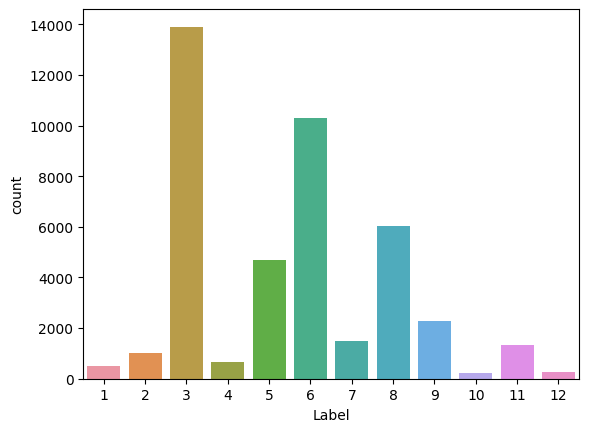

<Figure size 1000x600 with 0 Axes>

In [ ]:
sns.countplot(x = seq_file['Label'] )
plt.figure(figsize=(10, 6))
plt.show()

#Make All Sequences in the same Length

In [ ]:
## we will fixed length 512
## here we checked how many sequence have length >= 512

l = []
la = []
for i in range(42685):
    if len(seq_file['sequence'][i]) >= 512:
        l.append(seq_file['sequence'][i])
        la.append(seq_file['Label'][i])
    #print(seq_file['sequence'][i])

  #else:
    #if seq_file['Label'] == 1:
      #reminder_of_1024 = 1024 - len(seq_file['sequence'][i])
      #full_seq = seq_file['sequence'][i] + seq_file['sequence'][i]

len(l)

1833

In [ ]:
## using K-mer technique we will make all sequences in the same length
## then put it in DataFrame

#dna = "CTCCTTGGCGCCTGCCTGATCCTCCAAATCACCACAGGACTATTCCTAGCCATGCACTACTCACCAGACGCCTCAACCGCCTTTTCATCAATCGCCCACATCACTCGAGACGTAAATTATGGCTGAATCATCCGCTACCTTCACGCCAATGGCGCCTCAATATTCTTTATCTGCCTCTTCCTACACATCGGGCGAGGCCTATATTACGGATCATTTCTCTACTCAGAAACCTGAAACATCGGCATTATCCTCCTGCTTGCAACTATAGCAACAGCCTTCATAGGCTATGTCCTCCCGTGAGGCCAAATATCATTCTGAGGGGCCACAGTAATTACAAACTTACTATCCGCCATCCCATACATTGGGACAGACCTAGTTCAATGAATCTGAGGAGGCTACTCAGTAGACAGTCCCACCCTCACACGATTCTTTACCTTTCACTTCATCTTGCCCTTCATTATTGCAGCCCTAGCAACACTCCACCTCCTATTCTTGCACGAAACGGGATCAAACAACCCCCTAGGAATCACCTCCCATTCCGATAAAATCACCTTCCACCCTTACTACACAATCAAAGACGCCCTCGGCTTACTTCTCTTCCTTCTCTCCTTAATGACATTAACACTATTCTCACCAGACCTCCTAGGCGACCCAGACAATTATACCCTAGCCAACCCCTTAAACACCCCTCCCCACATCAAGCCCGAATGATATTTCCTATTCGCCTACACAATTCTCCGATCCGTCCCTAACAAACTAGGAGGCGTCCTTGCCCTATTACTATCCATCCTCATCCTAGCAATAATCCCCATCCTCCATATATCCAAACAACAAAGCATAATATTTCGCCCACTAAGCCAATCACTTTATTGACTCCTAGCCGCAGACCTCCTCATTCTAACCTGAATCGGAGGACAACCAGTAAGCTACCCTTTTACCATCATTGGACAAGTAGCATCCGTACTATACTTCACAACAATCCTAATCCTAATACCAACTATCTCCCTAATTGAAAACAAAATACTCAAATGGGCCTGTCCTTGTAGTATAAACTAATACACCAGTCTTGTAAACCGGAGATGAAAACCTTTTTCCAAGGACAAATCAGAGAAAAAGTCTTTAACTCCACCATTAGCACCCAAAGCTAAGATTCTAATTTAAACTATTCTCTGTTCTTTCATGGGGAAGCAGATTTGGGTACCACCCAAGTATTGACTCACCCATCAACAACCGCTATGTATTTCGTACATTACTGCCAGCCACCATGAATATTGTACGGTACCATAAATACTTGACCACCTGTAGTACATAAAAACCCAATCCACATCAAAACCCCCTCCCCATGCTTACAAGCAAGTACAGCAATCAACCCTCAACTATCACACATCAACTGCAACTCCAAAGCCACCCCTCACCCACTAGGATACCAACAAACCTACCCACCCTTAACAGTACATAGTACATAAAGCCATTTACCGTACATAGCACATTACAGTCAAATCCCTTCTCGTCCCCATGGATGACCCCCCTCAGATAGGGGTCCCTTGACCACCATCCTCCGTGAAATCAATATCCCGCACAAGAGTGCTACTCTCCTCGCTCCGGGCCCATAACACTTGGG"
all = pd.DataFrame()
for i in range(len(l)):
    dna = l[i]
    sequence_length = 512
    lst = [dna[i:i+sequence_length] for i in range(0, len(dna) - sequence_length + 1, 1)]
  #all.append(lst)
    all = all.append(lst,ignore_index=True)
#len(all)
all

<ipython-input-4-c212f0ffe6e3>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all = all.append(lst,ignore_index=True)


,0
0,TCCATACCCATTACAATCTCCAGCATTCCCCCTCAAACCTAAGAAA...
1,CCATACCCATTACAATCTCCAGCATTCCCCCTCAAACCTAAGAAAT...
2,CATACCCATTACAATCTCCAGCATTCCCCCTCAAACCTAAGAAATA...
3,ATACCCATTACAATCTCCAGCATTCCCCCTCAAACCTAAGAAATAT...
4,TACCCATTACAATCTCCAGCATTCCCCCTCAAACCTAAGAAATATG...
...,...
269836,CACTATTCTCACCAGACCTCCTAGGCGACCCAGACAATTATACCCT...
269837,ACTATTCTCACCAGACCTCCTAGGCGACCCAGACAATTATACCCTA...
269838,CTATTCTCACCAGACCTCCTAGGCGACCCAGACAATTATACCCTAG...
269839,TATTCTCACCAGACCTCCTAGGCGACCCAGACAATTATACCCTAGC...


In [ ]:
# Create k-mer for labels in a dataframe

label = pd.DataFrame()
c=0
for i in range(len(l)):
    dna = l[i]
    lst = [la[c] for i in range(0, len(dna) - sequence_length + 1, 1)]
    label = label.append(lst,ignore_index=True)
    c+=1
#len(all)
label

<ipython-input-5-fd2134866f51>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  label = label.append(lst,ignore_index=True)


,0
0,2
1,2
2,2
3,2
4,2
...,...
269836,2
269837,2
269838,2
269839,2


In [ ]:
## Concatenate sequences with labels

df = pd.concat([all,label] , axis=1)
df

,0,0
0,TCCATACCCATTACAATCTCCAGCATTCCCCCTCAAACCTAAGAAA...,2
1,CCATACCCATTACAATCTCCAGCATTCCCCCTCAAACCTAAGAAAT...,2
2,CATACCCATTACAATCTCCAGCATTCCCCCTCAAACCTAAGAAATA...,2
3,ATACCCATTACAATCTCCAGCATTCCCCCTCAAACCTAAGAAATAT...,2
4,TACCCATTACAATCTCCAGCATTCCCCCTCAAACCTAAGAAATATG...,2
...,...,...
269836,CACTATTCTCACCAGACCTCCTAGGCGACCCAGACAATTATACCCT...,2
269837,ACTATTCTCACCAGACCTCCTAGGCGACCCAGACAATTATACCCTA...,2
269838,CTATTCTCACCAGACCTCCTAGGCGACCCAGACAATTATACCCTAG...,2
269839,TATTCTCACCAGACCTCCTAGGCGACCCAGACAATTATACCCTAGC...,2


In [ ]:
## Stoore DataFrame as Excel

df.to_excel("512_data.xlsx")

# Data After Make it at the same length

In [ ]:
seq_file = pd.read_csv("512_data.csv")
seq_file

,sequence,Label
0,TCCATACCCATTACAATCTCCAGCATTCCCCCTCAAACCTAAGAAA...,2
1,CCATACCCATTACAATCTCCAGCATTCCCCCTCAAACCTAAGAAAT...,2
2,CATACCCATTACAATCTCCAGCATTCCCCCTCAAACCTAAGAAATA...,2
3,ATACCCATTACAATCTCCAGCATTCCCCCTCAAACCTAAGAAATAT...,2
4,TACCCATTACAATCTCCAGCATTCCCCCTCAAACCTAAGAAATATG...,2
...,...,...
269836,CACTATTCTCACCAGACCTCCTAGGCGACCCAGACAATTATACCCT...,2
269837,ACTATTCTCACCAGACCTCCTAGGCGACCCAGACAATTATACCCTA...,2
269838,CTATTCTCACCAGACCTCCTAGGCGACCCAGACAATTATACCCTAG...,2
269839,TATTCTCACCAGACCTCCTAGGCGACCCAGACAATTATACCCTAGC...,2


# Drop Dublicates

In [ ]:
seq_file.drop_duplicates(subset=['sequence', 'Label'] , keep=False, inplace=True)
seq_file

,sequence,Label
1918,AAAACCTTTTTCCAAGGACAAATCAGAGAAAAAGTCTTTAACTCCA...,2
1919,AAACCTTTTTCCAAGGACAAATCAGAGAAAAAGTCTTTAACTCCAC...,2
1920,AACCTTTTTCCAAGGACAAATCAGAGAAAAAGTCTTTAACTCCACC...,2
1921,ACCTTTTTCCAAGGACAAATCAGAGAAAAAGTCTTTAACTCCACCA...,2
1922,CCTTTTTCCAAGGACAAATCAGAGAAAAAGTCTTTAACTCCACCAT...,2
...,...,...
268673,ACAATGAAGAACTAGAGAACTGACCTTCTAGAAGTCAGGACAAAGG...,2
268674,CAATGAAGAACTAGAGAACTGACCTTCTAGAAGTCAGGACAAAGGG...,2
268675,AATGAAGAACTAGAGAACTGACCTTCTAGAAGTCAGGACAAAGGGC...,2
268676,ATGAAGAACTAGAGAACTGACCTTCTAGAAGTCAGGACAAAGGGCA...,2


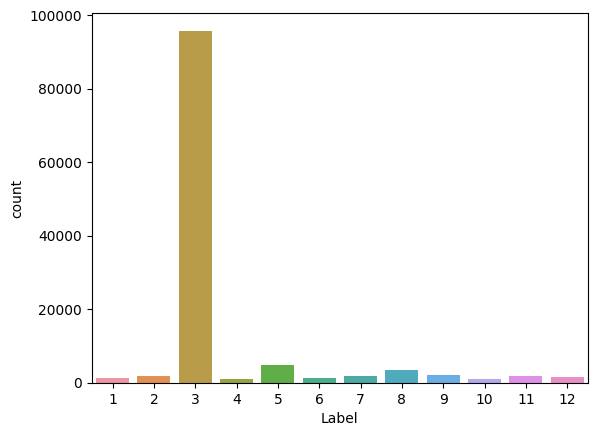

<Figure size 1000x600 with 0 Axes>

In [ ]:
## visualization for Data after Drop Dublicates

sns.countplot(x = seq_file['Label'] )
plt.figure(figsize=(10, 6))
plt.show()

''' After removing duplication,we found that cell type 3 has a very high number of reads which make data unbalanced so, we drop cell type 3 '''

# Try To Make Data Balanced

In [ ]:
## Drop cell type 3

seq_file = seq_file[seq_file["Label"] != 3]
seq_file

,sequence,Label
1918,AAAACCTTTTTCCAAGGACAAATCAGAGAAAAAGTCTTTAACTCCA...,2
1919,AAACCTTTTTCCAAGGACAAATCAGAGAAAAAGTCTTTAACTCCAC...,2
1920,AACCTTTTTCCAAGGACAAATCAGAGAAAAAGTCTTTAACTCCACC...,2
1921,ACCTTTTTCCAAGGACAAATCAGAGAAAAAGTCTTTAACTCCACCA...,2
1922,CCTTTTTCCAAGGACAAATCAGAGAAAAAGTCTTTAACTCCACCAT...,2
...,...,...
268673,ACAATGAAGAACTAGAGAACTGACCTTCTAGAAGTCAGGACAAAGG...,2
268674,CAATGAAGAACTAGAGAACTGACCTTCTAGAAGTCAGGACAAAGGG...,2
268675,AATGAAGAACTAGAGAACTGACCTTCTAGAAGTCAGGACAAAGGGC...,2
268676,ATGAAGAACTAGAGAACTGACCTTCTAGAAGTCAGGACAAAGGGCA...,2


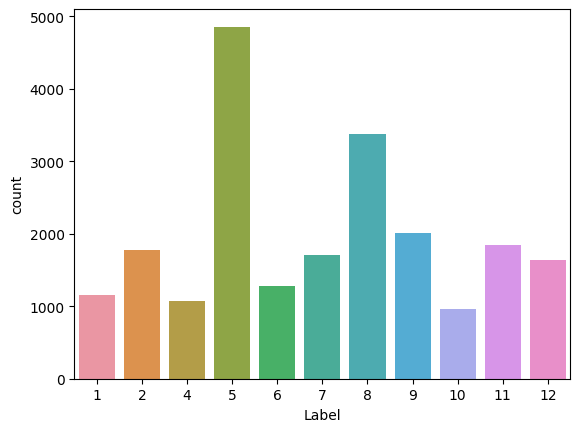

<Figure size 1000x600 with 0 Axes>

In [ ]:
## visualization for Data after Drop cell type 3

sns.countplot(x = seq_file['Label'] )
plt.figure(figsize=(10, 6))
plt.show()

'Also cell type 5 with
 very high number of reads which make
data unbalanced
 so we drop cell 5 '

In [ ]:
## Drop cell type 5

seq_file = seq_file[seq_file["Label"] != 5]
seq_file

,sequence,Label
1918,AAAACCTTTTTCCAAGGACAAATCAGAGAAAAAGTCTTTAACTCCA...,2
1919,AAACCTTTTTCCAAGGACAAATCAGAGAAAAAGTCTTTAACTCCAC...,2
1920,AACCTTTTTCCAAGGACAAATCAGAGAAAAAGTCTTTAACTCCACC...,2
1921,ACCTTTTTCCAAGGACAAATCAGAGAAAAAGTCTTTAACTCCACCA...,2
1922,CCTTTTTCCAAGGACAAATCAGAGAAAAAGTCTTTAACTCCACCAT...,2
...,...,...
268673,ACAATGAAGAACTAGAGAACTGACCTTCTAGAAGTCAGGACAAAGG...,2
268674,CAATGAAGAACTAGAGAACTGACCTTCTAGAAGTCAGGACAAAGGG...,2
268675,AATGAAGAACTAGAGAACTGACCTTCTAGAAGTCAGGACAAAGGGC...,2
268676,ATGAAGAACTAGAGAACTGACCTTCTAGAAGTCAGGACAAAGGGCA...,2


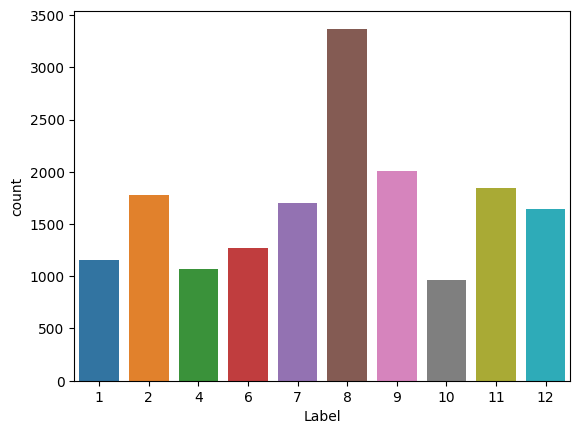

<Figure size 1000x600 with 0 Axes>

In [ ]:
## visualization for Data after Drop cell type 5

sns.countplot(x = seq_file['Label'] )
plt.figure(figsize=(10, 6))
plt.show()

The same for cell type 8 ,so we drop it


In [ ]:
## Drop cell type 8

seq_file = seq_file[seq_file["Label"] != 8]
seq_file

,sequence,Label
1918,AAAACCTTTTTCCAAGGACAAATCAGAGAAAAAGTCTTTAACTCCA...,2
1919,AAACCTTTTTCCAAGGACAAATCAGAGAAAAAGTCTTTAACTCCAC...,2
1920,AACCTTTTTCCAAGGACAAATCAGAGAAAAAGTCTTTAACTCCACC...,2
1921,ACCTTTTTCCAAGGACAAATCAGAGAAAAAGTCTTTAACTCCACCA...,2
1922,CCTTTTTCCAAGGACAAATCAGAGAAAAAGTCTTTAACTCCACCAT...,2
...,...,...
268673,ACAATGAAGAACTAGAGAACTGACCTTCTAGAAGTCAGGACAAAGG...,2
268674,CAATGAAGAACTAGAGAACTGACCTTCTAGAAGTCAGGACAAAGGG...,2
268675,AATGAAGAACTAGAGAACTGACCTTCTAGAAGTCAGGACAAAGGGC...,2
268676,ATGAAGAACTAGAGAACTGACCTTCTAGAAGTCAGGACAAAGGGCA...,2


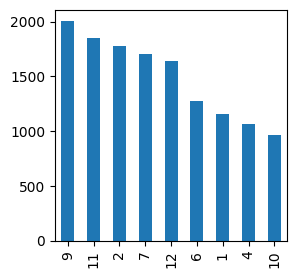

In [ ]:
plt.figure(figsize=(3,3))
outcome_type=pd.value_counts(seq_file['Label'],sort=True)
outcome_type.plot(kind='bar')
plt.show()

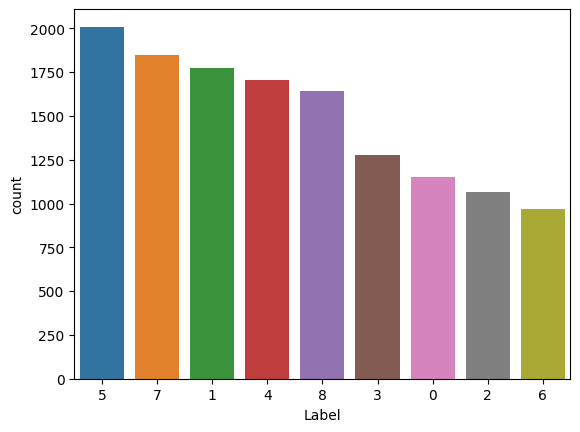

<Figure size 1000x600 with 0 Axes>

In [ ]:
## visualization for Data after Drop cell type 8

sns.countplot(x = seq_file['Label'] ,order = seq_file['Label'].value_counts().index)
plt.figure(figsize=(10, 6))
plt.show()

Finally Balanced data


---



---



# Reset Indexes of Data (Sorting index)

In [ ]:
## Reset Labels

seq_file['Label'].replace(1,0 , inplace=True)
seq_file['Label'].replace(2,1 , inplace=True)
seq_file['Label'].replace(4,2 , inplace=True)
seq_file['Label'].replace(6,3 , inplace=True)
seq_file['Label'].replace(7,4 , inplace=True)
seq_file['Label'].replace(9,5 , inplace=True)
seq_file['Label'].replace(10,6 ,inplace=True)
seq_file['Label'].replace(11,7 ,inplace=True)
seq_file['Label'].replace(12,8 ,inplace=True)

<ipython-input-49-ccf22fa14cfd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seq_file['Label'].replace(1,0 , inplace=True)
<ipython-input-49-ccf22fa14cfd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seq_file['Label'].replace(2,1 , inplace=True)
<ipython-input-49-ccf22fa14cfd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seq_file['Label'].replace(4,2 , inplace=True)
<ipython-input-49-ccf22fa14cfd>:4: SettingWithCopyWarning:

In [ ]:
## Reset Sequences

seq_file = seq_file.reset_index(drop=True)
seq_file

,sequence,Label
0,AAAACCTTTTTCCAAGGACAAATCAGAGAAAAAGTCTTTAACTCCA...,1
1,AAACCTTTTTCCAAGGACAAATCAGAGAAAAAGTCTTTAACTCCAC...,1
2,AACCTTTTTCCAAGGACAAATCAGAGAAAAAGTCTTTAACTCCACC...,1
3,ACCTTTTTCCAAGGACAAATCAGAGAAAAAGTCTTTAACTCCACCA...,1
4,CCTTTTTCCAAGGACAAATCAGAGAAAAAGTCTTTAACTCCACCAT...,1
...,...,...
13429,ACAATGAAGAACTAGAGAACTGACCTTCTAGAAGTCAGGACAAAGG...,1
13430,CAATGAAGAACTAGAGAACTGACCTTCTAGAAGTCAGGACAAAGGG...,1
13431,AATGAAGAACTAGAGAACTGACCTTCTAGAAGTCAGGACAAAGGGC...,1
13432,ATGAAGAACTAGAGAACTGACCTTCTAGAAGTCAGGACAAAGGGCA...,1


# Encoding Sequences

In [ ]:
## Split Sequences from Labels

seq = seq_file['sequence'].astype(str)
#seq = seq[0]
letters = ['A','T','C','G']
print(seq)

0        AAAACCTTTTTCCAAGGACAAATCAGAGAAAAAGTCTTTAACTCCA...
1        AAACCTTTTTCCAAGGACAAATCAGAGAAAAAGTCTTTAACTCCAC...
2        AACCTTTTTCCAAGGACAAATCAGAGAAAAAGTCTTTAACTCCACC...
3        ACCTTTTTCCAAGGACAAATCAGAGAAAAAGTCTTTAACTCCACCA...
4        CCTTTTTCCAAGGACAAATCAGAGAAAAAGTCTTTAACTCCACCAT...
                               ...                        
13429    ACAATGAAGAACTAGAGAACTGACCTTCTAGAAGTCAGGACAAAGG...
13430    CAATGAAGAACTAGAGAACTGACCTTCTAGAAGTCAGGACAAAGGG...
13431    AATGAAGAACTAGAGAACTGACCTTCTAGAAGTCAGGACAAAGGGC...
13432    ATGAAGAACTAGAGAACTGACCTTCTAGAAGTCAGGACAAAGGGCA...
13433    TGAAGAACTAGAGAACTGACCTTCTAGAAGTCAGGACAAAGGGCAG...
Name: sequence, Length: 13434, dtype: object


In [ ]:
ls =[]
total_matrix = []
for i in range(13434):
    #print(seq[i])
    s=seq[i]

    seq_matrix=np.zeros((4,len(s)))
    j=0
    for char in s:
        if char == 'A':
            seq_matrix[0][j]=1
        if char == 'T':
            seq_matrix[1][j]=1
        if char == 'C':
            seq_matrix[2][j]=1
        if char == 'G':
            seq_matrix[3][j]=1
        j+=1
    #print(seq_matrix)

    total_matrix.append(seq_matrix)
    ss = seq_matrix.flatten()
    ls.append(ss)
    #df_n =df.append(ss,ignore_index=True)


In [ ]:
## matrix of size (4, 512)

print(seq[0])
print(total_matrix[0])
print(total_matrix[0].shape)

AAAACCTTTTTCCAAGGACAAATCAGAGAAAAAGTCTTTAACTCCACCATTAGCACCCAAAGCTAAGATTCTAATTTAAACTATTCTCTGTTCTTTCATGGGGAAGCAGATTTGGGTACCACCCAAGTATTGACTCACCCATCAACAACCGCTATGTATTTCGTACATTACTGCCAGCCACCATGAATATTGTACGGTACCATAAATACTTGACCACCTGTAGTACATAAAAACCCAATCCACATCAAAACCCCCTCCCCATGCTTACAAGCAAGTACAGCAATCAACCCTCAACTATCACACATCAACTGCAACTCCAAAGCCACCCCTCACCCACTAGGATACCAACAAACCTACCCACCCTTAACAGTACATAGTACATAAAGCCATTTACCGTACATAGCACATTACAGTCAAATCCCTTCTCGTCCCCATGGATGACCCCCCTCAGATAGGGGTCCCTTGACCACCATCCTCCGTGAAATCAATATCCCGCACAAGAGTGCTACTCT
[[1. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(4, 512)


In [ ]:
## put sequences in dataframe
df_n = pd.DataFrame(ls)
df_n

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13429,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
13430,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
13431,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13432,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Final Data That Enter to Model

In [ ]:
blocks = seq_file['Label']
blocks = np.array(blocks)


df_new = pd.concat([df_n, pd.DataFrame({'Labels' : blocks})], axis=1)
df_new

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,Labels
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13429,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1
13430,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
13431,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
13432,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1


# Split Data

In [ ]:
X = df_new.drop(columns='Labels')
y = df_new['Labels']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=2)

In [ ]:
# make labels as a vector like sequences

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

# Final Model

In [ ]:
import keras

from keras.layers import Conv1D


model = keras.models.Sequential()

model.add(Conv1D(64, 4, input_shape = (2048  ,1) , activation="relu"))
model.add(MaxPool1D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(32, 4, input_shape = (2048  ,1) , activation="relu"))
model.add(MaxPool1D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(27, 4, input_shape = (2048  ,1) , activation="relu"))
model.add(MaxPool1D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.2))


model.add(Conv1D(15, 2, input_shape = (2048 ,1) , activation="relu"))
model.add(MaxPool1D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dense(9, activation='sigmoid', input_shape=(None, 4)))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 2045, 64)          320       
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 1022, 64)         0         
 g1D)                                                            
                                                                 
 batch_normalization_12 (Bat  (None, 1022, 64)         256       
 chNormalization)                                                
                                                                 
 dropout_15 (Dropout)        (None, 1022, 64)          0         
                                                                 
 conv1d_13 (Conv1D)          (None, 1019, 32)          8224      
                                                                 
 max_pooling1d_13 (MaxPoolin  (None, 509, 32)         

In [ ]:
model.compile(optimizer = 'Adam' , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
histroy = model.fit(x_train, y_train, batch_size=100,verbose=1,epochs=20 , validation_data=(x_test, y_test))

Epoch 1/20
115/115 [==============================] - 111s 923ms/step - loss: 1.9465 - accuracy: 0.3134 - val_loss: 4.3017 - val_accuracy: 0.1220
Epoch 2/20
115/115 [==============================] - 99s 865ms/step - loss: 1.0796 - accuracy: 0.5882 - val_loss: 7.1820 - val_accuracy: 0.1220
Epoch 3/20
115/115 [==============================] - 104s 905ms/step - loss: 0.7317 - accuracy: 0.6919 - val_loss: 5.8378 - val_accuracy: 0.1220
Epoch 4/20
115/115 [==============================] - 104s 905ms/step - loss: 0.6185 - accuracy: 0.7174 - val_loss: 2.2969 - val_accuracy: 0.3100
Epoch 5/20
115/115 [==============================] - 100s 870ms/step - loss: 0.5669 - accuracy: 0.7212 - val_loss: 0.8809 - val_accuracy: 0.5972
Epoch 6/20
115/115 [==============================] - 96s 838ms/step - loss: 0.5353 - accuracy: 0.7295 - val_loss: 0.5651 - val_accuracy: 0.7078
Epoch 7/20
115/115 [==============================] - 97s 845ms/step - loss: 0.5212 - accuracy: 0.7284 - val_loss: 0.4914 - va

In [ ]:
model.evaluate(x_test, y_test, verbose=2)

63/63 - 2s - loss: 0.4484 - accuracy: 0.6984 - 2s/epoch - 39ms/step


[0.44839391112327576, 0.6984127163887024]

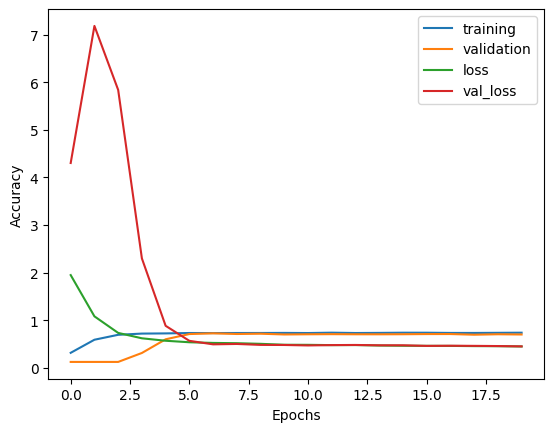

In [ ]:
plt.plot(histroy.history['accuracy'],label='training')
plt.plot(histroy.history['val_accuracy'],label='validation')
plt.plot(histroy.history["loss"],label='loss')
plt.plot(histroy.history["val_loss"],label='val_loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

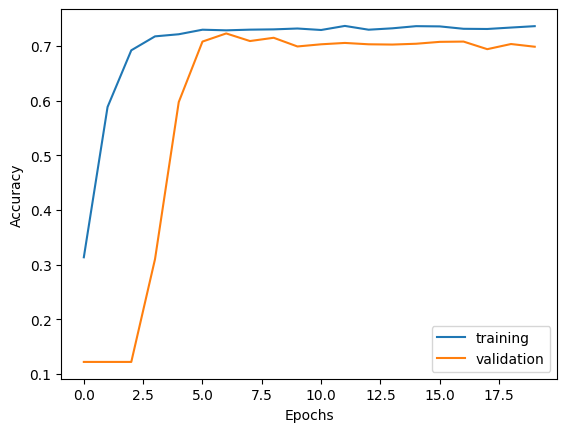

In [ ]:
plt.plot(histroy.history['accuracy'],label='training')
plt.plot(histroy.history['val_accuracy'],label='validation')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

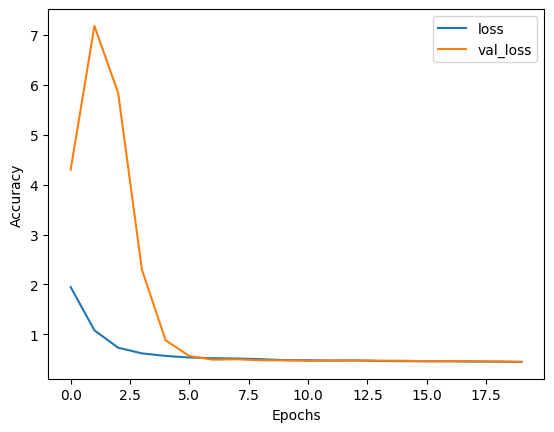

In [ ]:
plt.plot(histroy.history["loss"],label='loss')
plt.plot(histroy.history["val_loss"],label='val_loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model.save('69_acc.h5')

In [ ]:
new_model = tf.keras.models.load_model('69_acc.h5')

# Show the model architecture
new_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 2045, 64)          320       
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 1022, 64)         0         
 g1D)                                                            
                                                                 
 batch_normalization_12 (Bat  (None, 1022, 64)         256       
 chNormalization)                                                
                                                                 
 dropout_15 (Dropout)        (None, 1022, 64)          0         
                                                                 
 conv1d_13 (Conv1D)          (None, 1019, 32)          8224      
                                                                 
 max_pooling1d_13 (MaxPoolin  (None, 509, 32)         